In [1]:
%pylab inline
import pyfits

Populating the interactive namespace from numpy and matplotlib


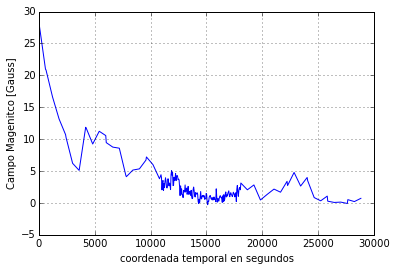

In [2]:
datos = pyfits.open('hmi.m_45s.magnetogram.subregion_x1y1.fits')
cols = datos[0].data
#x = linspace(0, 397, 398);y = linspace(0, 198, 199);z = linspace(0, 206, 207)
campo = cols[:,38,3] # Punto arbitrario de la imagen
tiempo=np.genfromtxt('times_delta.csv', delimiter=',')

plot(tiempo, campo)
xlabel("coordenada temporal en segundos"); ylabel("Campo Magenitco [Gauss]"); grid()

Ajustar a modelo lineal
$$B(t)=a+Bt$$

In [88]:
def modelo_lineal(t_obs,a,b):
    return a + b*t_obs

#funcion de likelihood lineal, sin exp
def likelihood(y_obs,y_m):
    chi_cuadrado= (1.0/2.0)*sum((y_obs-y_m)**2) # Se esta asumiendo que los sigmas = 1
    return -chi_cuadrado


In [109]:
a_walk = empty((0))
b_walk = empty((0))
like_walk = empty((0))

a_walk = append(a_walk,random.random()*5 +5)
b_walk = append(b_walk,random.random()*400 -200)

y_i = modelo_lineal(tiempo, a_walk[0],b_walk[0]) # y inicial
like_walk = append(like_walk,likelihood(campo,y_i)) # likelyhood
print(a_walk,b_walk,like_walk)

[ 7.30781953] [ 66.02617085] [ -1.05068445e+14]


In [113]:
iteraciones = 20000
for i in range(iteraciones):
    a_prime = random.normal(a_walk[i], 2.0) # Desviacion estandar se asume que es 1 desde la definicion del likelyhood
    b_prime = random.normal(b_walk[i], 2.0) # Entre mas desviacion estandar asigne a los parametros,
    # el metodo tiene en cuanta variaciones de mayor magnitud para los parametros.
    
    y_init = modelo_lineal(tiempo, a_walk[i], b_walk[i])
    y_prime = modelo_lineal(tiempo, a_prime, b_prime)
    
    like_prime = likelihood(campo, y_prime)
    like_init = likelihood(campo, y_init)
    
    
    alpha = like_prime-like_init 
    
    if(alpha>=0.0): # likelihood definido sin exp
            a_walk  = np.append(a_walk,a_prime)
            b_walk  = np.append(b_walk,b_prime)
            like_walk = np.append(like_walk, like_prime)
    else:
        beta = log(random.random())
        if(alpha>=beta):
            a_walk = append(a_walk,a_prime)
            b_walk = append(b_walk,b_prime)
            like_walk = append(like_walk, like_prime)
        else:
            a_walk = append(a_walk,a_walk[i])
            b_walk = append(b_walk,b_walk[i])
            like_walk = append(like_walk, like_init)            

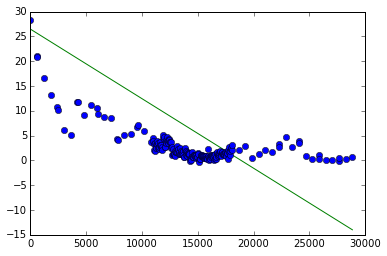

In [114]:
max_likelihood_id = argmax(like_walk)
best_a = a_walk[max_likelihood_id]
best_b = b_walk[max_likelihood_id]
best_campo = modelo_lineal(tiempo, best_a, best_b)
plot(tiempo,best_campo,'g-')
plot(tiempo,campo,'bo')

#Intentos anteriores

In [115]:
for i in range(iteraciones):  
        a_prime = np.random.normal(a_walk[i], 0.1) 
        b_prime = np.random.normal(b_walk[i], 0.1)

        y_init = modelo_lineal(z, a_walk[i], b_walk[i])
        y_prime = modelo_lineal(z, a_prime, b_prime) #
    
        like_prime = likelihood(campo_m, y_prime)
        like_init = likelihood(campo_m, y_init)
    
        alpha = like_prime-like_init
        
        if(alpha>=1.0):
            a_walk  = np.append(a_walk,a_prime)
            b_walk  = np.append(b_walk,b_prime)
            like_walk = np.append(like_walk, like_prime)
        else:
            beta = log(np.random.random())
            if(beta<=alpha):
                a_walk = np.append(a_walk,a_prime)
                b_walk = np.append(b_walk,b_prime)
                like_walk = np.append(like_walk, like_prime)
            else:
                a_walk = np.append(a_walk,a_walk[i])
                b_walk = np.append(b_walk,b_walk[i])
                like_walk = np.append(like_walk, like_init)

NameError: name 'z' is not defined

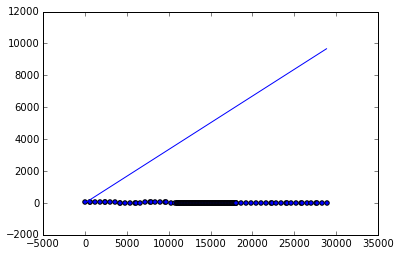

In [29]:
max_likelihood = np.argmax(likelihood)
best_a = a_walk[max_likelihood]
best_b = b_walk[max_likelihood]
best_campo = modelo_lineal(tiempo, best_a, best_b)
plot (tiempo,best_campo)
scatter(tiempo,campo_m)

#Ajuste curve_fit

In [116]:
from scipy.optimize import curve_fit

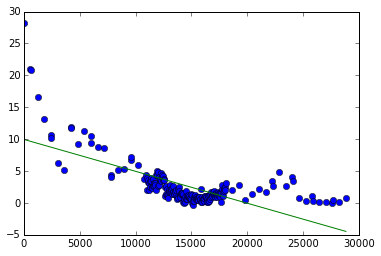

In [117]:
plot(tiempo,campo,'o')
def lineal(t,m,b):
    return b + m*t
args,info = curve_fit(lineal,tiempo,campo,p0=(0,0))
t = linspace(min(tiempo), max(tiempo), 500)
y = lineal(t,args[0],args[1])
plot(t,y,'g-')

/home/j-camilo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/home/j-camilo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/j-camilo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/j-camilo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/home/j-camilo/anaconda3/lib/python3.4/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


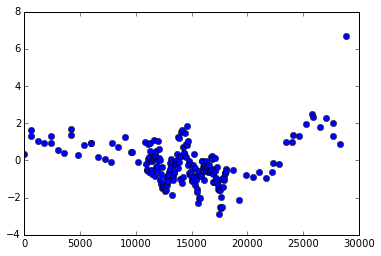

In [37]:
plot(tiempo,campo,'o')
def gauss(t,c,d,sigma,mu):
    return c + d*t + 1/(sigma*sqrt(2*pi))*exp(-0.5*((t-mu)/sigma)**2)
args,info = curve_fit(gauss,tiempo,campo,p0=(0,0,0,0))
t = linspace(min(tiempo), max(tiempo), 500)
y = gauss(t,args[0],args[1],args[2],args[3])
plot(t,y,'g-')

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

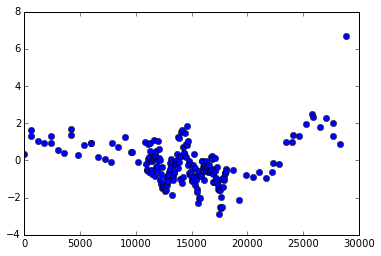

In [36]:
plot(tiempo,campo,'o')
def paso(t,f,g,h,n,t0):
    return f + g*t + h*(1+2/pi*arctan(n*(t-t0)))
args,info = curve_fit(paso,tiempo,campo,p0=(0,0,0,0,0))
t = linspace(min(tiempo), max(tiempo), 500)
y = paso(t,args[0],args[1],args[2],args[3],args[4])
plot(t,y,'g-')